[[1.000e+00 1.110e+03]
 [2.000e+00 1.340e+03]
 [3.000e+00 1.521e+03]
 [4.000e+00 1.766e+03]
 [5.000e+00 1.515e+03]
 [6.000e+00 1.392e+03]
 [7.000e+00 1.209e+03]
 [8.000e+00 1.483e+03]
 [9.000e+00 1.359e+03]
 [1.000e+01 1.604e+03]]
(92, 2)
Número de entradas incorrectas: 0
Parámetros del modelo fp1: [124.84696299 561.82274247]
Error del modelo fp1: [2.05736195e+08]
Parámetros del modelo fp2: [  -0.71296607  191.15280771 -476.96882465]
Error del modelo fp2: [1.87134705e+08]


C:\Users\Jhonatan H\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errores para el conjunto completo de datos:
Error d=1: 205736195.495145
Error d=2: 187134704.625450
Error d=3: 98674963.723213
Error d=10: 80892794.402808
Error d=78: 62322827.254484
Errores solamente después del punto de inflexión
Error d=1: 200420631.852664
Error d=2: 173362654.120657
Error d=3: 91116630.812735
Error d=10: 78701378.013028
Error d=78: 59923679.383328
Error de inflexión=202668209.741009
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 199901310.111444
Error d=2: 122062892.858078
Error d=3: 80321792.870638
Error d=10: 77611755.569562
Error d=78: 57406518.525193


C:\Users\Jhonatan H\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


fbt2(x)= 
        2
-3.327 x + 507.6 x - 9092
fbt2(x)-100,000= 
        2
-3.327 x + 507.6 x - 1.409e+04
Prueba de error para después del punto de inflexión


C:\Users\Jhonatan H\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Error d=1: 38402868.427002
Error d=2: 24834093.671600
Error d=3: 15577227.542055
Error d=10: 16186190.441298
Error d=78: 2124125390152.398926
        2
-3.327 x + 507.6 x - 9092
        2
-3.327 x + 507.6 x - 1.409e+04

5000 llegara a esta cifra en 116.051741


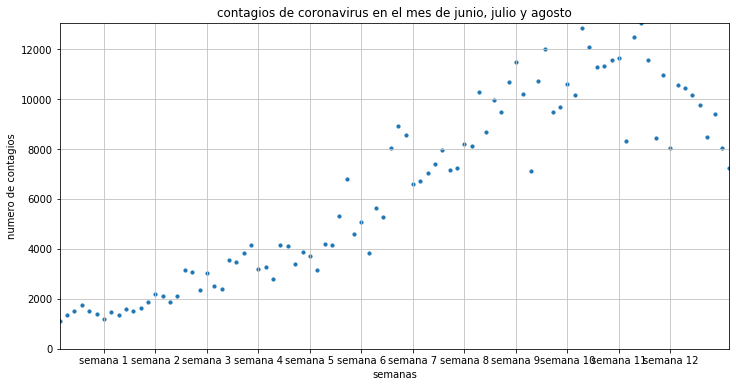

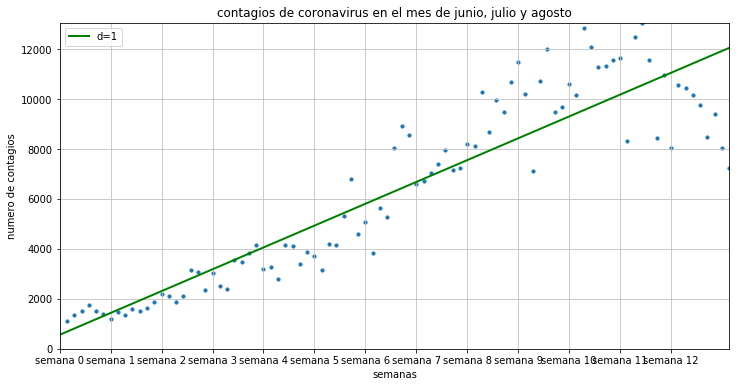

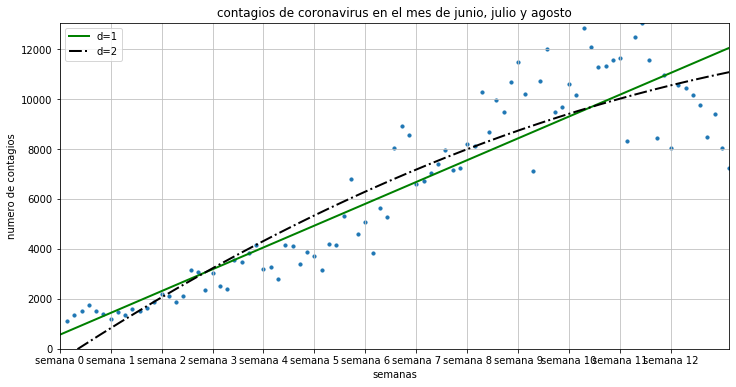

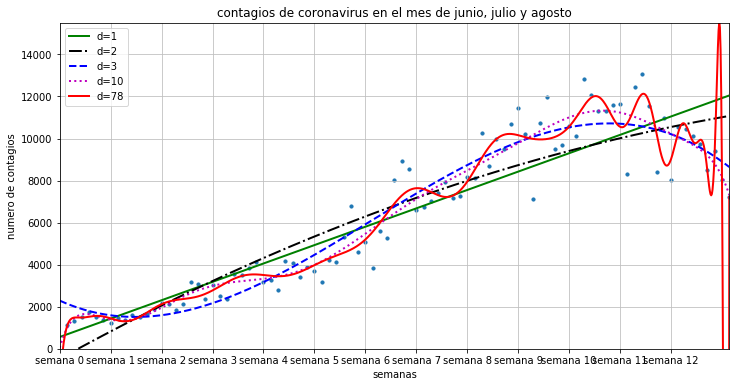

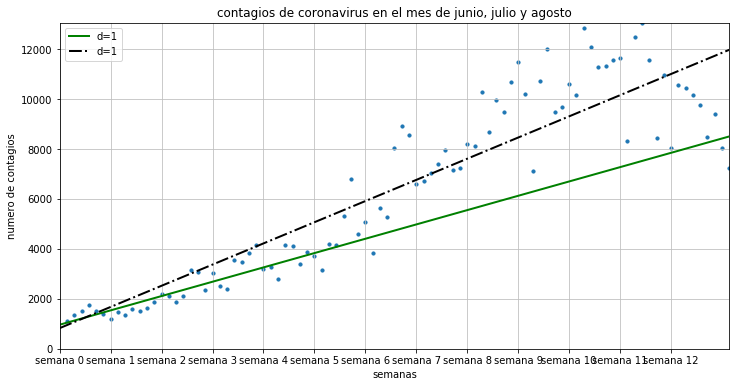

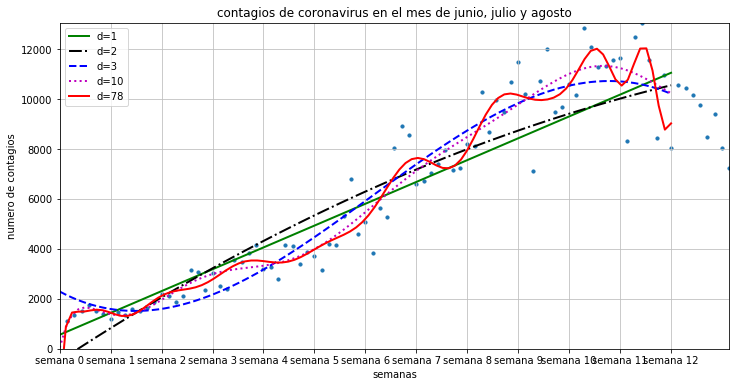

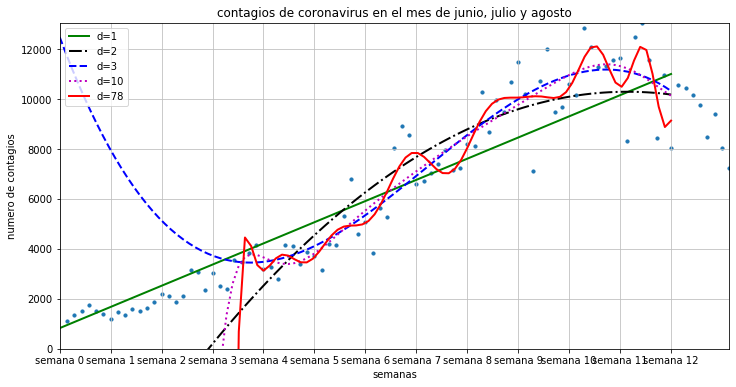

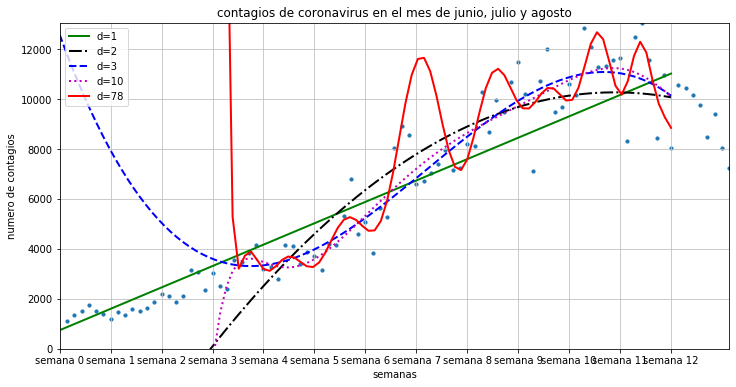

In [3]:
# COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# AJUSTES POLINOMIALES
# -----------------------------------------------------------------
# Lección 06
#
#   ** Se importan los archivos de trabajo
#   ** Se crean las variables
#   ** Se generan los modelos
#   ** Se grafican las funciones
#
# -----------------------------------------------------------------

# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
#jonatan hernandez henao 1053864927
import os

# Directorios: chart y data en el directorio de trabajo
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np

# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
#define que: todos = Ninguno , dividir = Ninguno , más de = Ninguno , menos de = Ninguno , inválido = Ninguno 
#establece como se manejan los puntos flotantes 
np.seterr(all='ignore')

# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
#la libreríascipy esta organiza por subpaquetes donde cada 1 esta enfocado a un tema de cálculos específicos:
import scipy as sp
import matplotlib.pyplot as plt

# Datos de trabajo
# -----------------------------------------------------------------
data = np.genfromtxt(os.path.join(DATA_DIR, "estadisticas.tsv"), 
                     delimiter="\t")
#la variable data, recibe el archivo web_traffic con el delimitador \t mediante la función np.genfromtxt

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
##x, y son los datos de las dos columnas, models es el tipo de modelo que se quiere
#mx define la recta, ymax representa el eje y maximo y xmin el eje x minimo

#def plot_models está arriba
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(12, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("contagios de coronavirus en el mes de junio, julio y agosto")
    
    # Título en la base
    plt.xlabel("semanas")
    
    # Título lateral
    plt.ylabel("numero de contagios")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7*24 + 2*7*24 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7*24. Esto permite
    # determinar los valores de w desde 1 hasta 5, indicando
    # con ello que se tiene un poco más de 4 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 4, lo cual constituye las semanas analizadas
    #la siguiente funcion se utiliza para ocultar las etiquetas y calcular el rango de semanas con horas y dias
    plt.xticks(
        [w * 7 * 1 for w in range(13)], 
        ['semana %i' % w for w in range(13)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve
        
        # Aquí se realiza un ciclo .....
        
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            # el plt.plot lo utilizamos para personalizar el modelado o grafica que esta elaborando 
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
            
        #el método legend de un conjunto de ejes muestra la leyenda en el gráfico. Vimos en su momento
        #que uno de los parámetros que podemos pasar a la función plot es label. Esta etiqueta es la 
        #que se mostrará en la leyenda representando a la gráfica

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    #autoescala un método para el ajuste de escala automático de vista de eje simple. 
    #Activa o desactiva el ajuste de escala automático y luego, si el ajuste de escala automático para cualquiera 
    #de los ejes está activado, realiza el ajuste de escala automático en el eje o ejes especificados.
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    #grid muestra las líneas de la cuadrícula. Si se proporcionan, se supone que desea que la cuadrícula esté activada
    #y se establecerá en True.
    plt.grid(True, linestyle='-', color='0.75')
    #el plt.savefig guarda la figura con su respectivo nombre, se guarda en el directorio CHARTS
    plt.savefig(fname)

# Primera mirada a los datos
# -----------------------------------------------------------------
#Utiliza la clase plot_models descrita anteriormente, enviando como parametro el eje x, eje y, None que se refiere al
#modelo y envia el archivo en formato png
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
#Se define la funcion numero 1 con la instruccion np.polyfit es un ajuste polinomial de mínimos cuadrados.
#Ajuste un polinomio de grado deg a los puntos (x, y).
#Devuelve un vector de coeficientes p que minimiza el error al cuadrado en el orden deg
#x como una matriz con coordenadas, y como un arreglo, 1 indica el grado del polinomio
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, 
                                                "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 3.5 * 7 * 1
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
#el sp.poly1d es Una clase polinomial unidimensional.
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))


# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    #El método en Python une uno o más componentes de ruta de forma inteligente.
    #Este método concatena varios componentes de ruta con exactamente un separador de directorio
    #('/') después de cada parte no vacía excepto el último componente de ruta
    os.path.join(CHART_DIR, "1400_01_06.png"),
    #Devuelve números espaciados uniformemente durante un intervalo especificado.
    #y el número de muestras espaciadas uniformemente, calculadas sobre el intervalo 
    mx=np.linspace(0 * 7 * 1, 12 * 7 * 1, 100),
    ymax=13056, xmin=0 * 7 * 1)

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7 * 1, 12 * 7 * 1, 100),
    ymax=13056, xmin=0 * 7 * 1)

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
frac = 0.3
# el split_idx produce el numero de indices 
split_idx = int(frac * len(xb))
#El shuffle()método toma una secuencia (lista, cadena o tupla) y reorganiza el orden de los elementos
#sp.random.permutation Permutar aleatoriamente una secuencia o devolver un rango permutado.
shuffled = sp.random.permutation(list(range(len(xb))))
#sorted es Una clasificación ascendente simple es muy fácil: simplemente llame a la sorted()función. Devuelve una nueva lista ordenada
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-5000))
#fb se utiliza para crear la funcion con inflexion, recibe xb con los varlores ordenados y yb con los valores tambien ordenados
#Se especifica el orden de dicho polinomio
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7 * 1, 12 * 7 * 1, 100),
    ymax=13056, xmin=0 * 7 * 1)
#ncuentra las raíces de una función.
#Devuelve las raíces de las ecuaciones (no lineales) definidas por una estimación inicial dada.
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 5000)
alcanzado_max = fsolve(fbt2 - 5000, x0=91)
print("\n5000 llegara a esta cifra en %f" % 
      alcanzado_max[0])